# MSBD566 - Lecture 6

## Classification [continued]

Most of the example and notes are taken from here: 
https://github.com/Jpickard1/Data-Analytics-for-Biomedical-Research/blob/main/Tutorial.ipynb



### Loading data and Python Setup

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, roc_curve, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb


ModuleNotFoundError: No module named 'xgboost'

For datasets, we will use the UCI Machine Learning Repository via the ucimlrepo package. We will need to install it first.
Depending on your environment, you can use either of the following commands to install the package.

`%pip install ucimlrepo`

or 

`!pip install ucimlrepo`

In [31]:
# import datasets module
%pip install ucimlrepo # or use "!pip install ucimlrepo" if you are not using iPython Magic Command.
from ucimlrepo import fetch_ucirepo

Note: you may need to restart the kernel to use updated packages.


**Data Information**

Problems of real-life complexity are needed to test and compare various data mining and pattern recognition methods. The proposed database can be used to solve two practically important problems: predicting complications of Myocardial Infarction (MI) based on information about the patient (i) at the time of admission and (ii) on the third day of the hospital period. Another important group of tasks is phenotyping of disease (cluster analysis), dynamic phenotyping (filament extraction and identification of disease trajectories) and visualisation (disease mapping). 
MI is one of the most challenging problems of modern medicine. Acute myocardial infarction is associated with high mortality in the first year after it. The incidence of MI remains high in all countries. This is especially true for the urban population of highly developed countries, which is exposed to chronic stress factors, irregular and not always balanced nutrition. In the United States, for example, more than a million people suffer from MI every year, and 200-300 thousand of them die from acute MI before arriving at the hospital. 
The course of the disease in patients with MI is different. MI can occur without complications or with complications that do not worsen the long-term prognosis. At the same time, about half of patients in the acute and subacute periods have complications that lead to worsening of the disease and even death. Even an experienced specialist can not always foresee the development of these complications. In this regard, predicting complications of myocardial infarction in order to timely carry out the necessary preventive measures is an important task. 

**Problems to solve**

In general columns 2-112 can be used as input data for prediction. Possible complications (outputs) are listed in columns 113-124.
There are four possible time moments for complication prediction: on base of the information known at
1.	the time of admission to hospital: all input columns (2-112) except 93, 94, 95, 100, 101, 102, 103, 104, 105 can be used for prediction;
2.	the end of the first day (24 hours after admission to the hospital): all input columns (2-112) except 94, 95, 101, 102, 104, 105 can be used for prediction;
3.	the end of the second day (48 hours after admission to the hospital) all input columns (2-112) except 95, 102, 105 can be used for prediction;
4.	the end of the third day (72 hours after admission to the hospital) all input columns (2-112) can be used for prediction.

You can find detailed description of database, descriptive statistics and csv version of database in DOI: 10.25392/leicester.data.12045261.v3


In [32]:
# import dataset
# Source: https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications
complications = fetch_ucirepo(id=579)
complications.data.features

# Split features vs predictors
X = complications.data.features # Get features
y = complications.data.targets  # Get predictors

# Fill missing values with 0
X = X.fillna(0)
y = y.fillna(0)

We are going to focus on Fiber Prediction (FIBR_PREDS)

In [33]:

# Choose a target to predict
y = y['FIBR_PREDS']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4, # 40% of the data will be used for testing
                                                    random_state=42 # Set a random state for reproducibility
                                                    )

### K-nearest neighbor (KNN)

Not to be confused with the neural network which has 'NN' term as well, this is a simple statistical that is not related to the deep learning.

`sklearn`'s KNN algorithm is implemented in the `KNeighbordsClassifier`. 2 inputs are needed
* `n_neighbors`: is the number of neighbors that each unknown datapoint must be compared to
* `metric`: is the distance measure that is used to compare the similarity of different datapoints. Options: 'euclidian', 'manhattan', 'minkowski', 'chebyshev'

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=1, metric='euclidean') #other metrics (distance measure): 'manhattan', 'minkowski', 'chebyshev'
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

K-Nearest Neighbors Accuracy: 0.8279411764705882


### Naive Bayes Model

`sklearn`'s Naive Bayes Model is implemented in the `GaussianNB`. Unlike KNN, this algorithm is parametric, meaning that the parameters for a probability distribution are learned during the training. No input is needed other than the training set. 

In [35]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.15588235294117647


### Decision Tree

`sklearn`'s Decision Tree algorithm is implemented in the `DecisionTreeClassifier`. It uses entropy as the criterion to measure the quality of splits and employs a random strategy for choosing the best split at each node.  The tree is limited to a maximum depth of 5 levels, and leaf nodes must contain at least 10 samples.

* `criterion`: The function to measure the quality of a split. In this case, `'entropy'` is used, which calculates the information gain based on the entropy.
* `splitter`: The strategy used to choose the split at each node. `'random'` means that random splits are considered, as opposed to `'best'` which would choose the best split.
* `max_depth`: maximum depth of the tree. Tree growth is halted once this depth is reached.
* `min_samples_leaf`: Specifies the minimum number of samples required to be at a leaf node. If a split results in a leaf node with fewer samples than this, the split is not considered valid.

In [36]:
dt_model = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_leaf=10)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9029411764705882


### Random Forest

`sklearn`'s random Forest algorithm is implemented in the `RandomForestClassifier`. It uses entropy as the criterion to measure the quality of splits, allows each tree to grow to a maximum depth of 10 levels, and requires at least 1 sample in each leaf node.

* `n_estimators`: Number of trees in the forest
* `criterion`: The function to measure the quality of a split. In this case, `'entropy'` is used, which calculates the information gain based on the entropy.
* `max_depth`: maximum depth of the tree. Tree growth is halted once this depth is reached.
* `min_samples_leaf`: Specifies the minimum number of samples required to be at a leaf node. If a split results in a leaf node with fewer samples than this, the split is not considered valid.

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, min_samples_leaf=1)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9029411764705882


### Support Vector Machine (SVM)

`sklearn`'s SVM algorithm is implemented in the `SVC`. It performs classification by finding the hyperplane that best separates two classes in an N-dimensional space (where N is the number of features).

Here we set the number of iterations to 1000. In this example, we represent our data with 111 features (column 2-112) in 111 dimensional space using standard distance. 

In [38]:
svm_model = SVC(max_iter=1000)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9029411764705882


/opt/homebrew/anaconda3/lib/python3.13/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


### Kernel Learning

`sklearn`'s SVM algorithm is implemented in the `SVC` with several kernels options. In regular SVM, the kernel=`rbf` is used as default. It performs classification by finding the hyperplane that best separates two classes in an N-dimensional space (where N is the number of features). Different kernels will give different distance function in the `SVC` function. 

Same as above, here, we set the number of iterations to 1000. In this example, we represent our data with 111 features (column 2-112) in 111 dimensional space. Options that we can set for the distance kernels are possibly `poly`, `rbf`, `sigmoid`, `precomputed`. We will see the performace without a kernel function by using `linear` option.

In [39]:
svmLinear_model = SVC(kernel='linear', max_iter=1000)
svmLinear_model.fit(X_train, y_train)
svmLinear_predictions = svmLinear_model.predict(X_test)
svmLinear_accuracy = accuracy_score(y_test, svmLinear_predictions)
print("SVM (no kernel) Accuracy:", svmLinear_accuracy)

SVM (no kernel) Accuracy: 0.6102941176470589


/opt/homebrew/anaconda3/lib/python3.13/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## Model Comparison & Cross Validation

We will use several metrics to do compare the model performance:
1. accuracy score
2. precision score
3. recall score
4. f1 score

Several cross-validation methods:
1. K-fold
2. Stratified K-fold
3. Leave-one-out
4. Leave-p-out

For classification, we will use stratified K-fold method. 

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_score

In [41]:
# Define cross-validation technique
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models and parameters
knn = KNeighborsClassifier()
dTree = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)
NB = GaussianNB()
SVM = SVC(random_state=42)
SVM_linear = SVC(kernel='linear', random_state=42)

# set models in a dictionary
modelslist = [
    knn,
    dTree,
    RF
]

In [42]:
# scoring model
score = 'accuracy' # other options: 'precision', 'recall', 'f1'
knn_cv_results = cross_validate(knn, X, y, cv=cv, scoring=score)
dTree_cv_results = cross_validate(dTree, X, y, cv=cv, scoring=score)
RF_cv_results = cross_validate(RF, X, y, cv=cv, scoring=score)

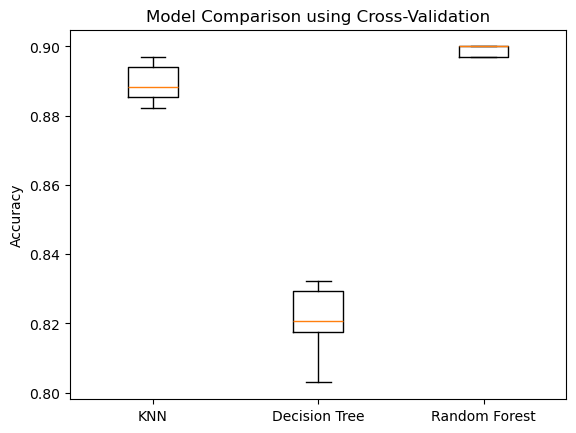

In [43]:
# get the score results
knn_scores = knn_cv_results['test_score']
dTree_scores = dTree_cv_results['test_score']
RF_scores = RF_cv_results['test_score']

# visualize the results
models = ['KNN', 'Decision Tree', 'Random Forest']
scores = [knn_scores, dTree_scores, RF_scores]
plt.boxplot(scores, tick_labels=models)
plt.ylabel('Accuracy')
plt.title('Model Comparison using Cross-Validation')
plt.show()

You can visualize the statistics of the training results using `cross_val_score()`

In [44]:
for m in modelslist:
    print(m)
    cv_scores = cross_val_score(m, X, y, cv=cv, scoring='f1')

    display(pd.DataFrame(cv_scores).describe().T)

KNeighborsClassifier()


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.049909,0.033821,0.0,0.047619,0.052632,0.054054,0.095238


DecisionTreeClassifier(random_state=42)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.135688,0.018868,0.114286,0.115942,0.147059,0.149254,0.151899


RandomForestClassifier(random_state=42)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To compare across different metrics at once, we can set in the cross_validation function to get all other scores.

In [45]:
# Compare different metrics at once
metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1': make_scorer(f1_score, average='weighted', zero_division=0)
}
knn_cv_all_results = cross_validate(knn, X, y, cv=cv, scoring=metrics)
dTree_cv_all_results = cross_validate(dTree, X, y, cv=cv, scoring=metrics)
RF_cv_all_results = cross_validate(RF, X, y, cv=cv, scoring=metrics)

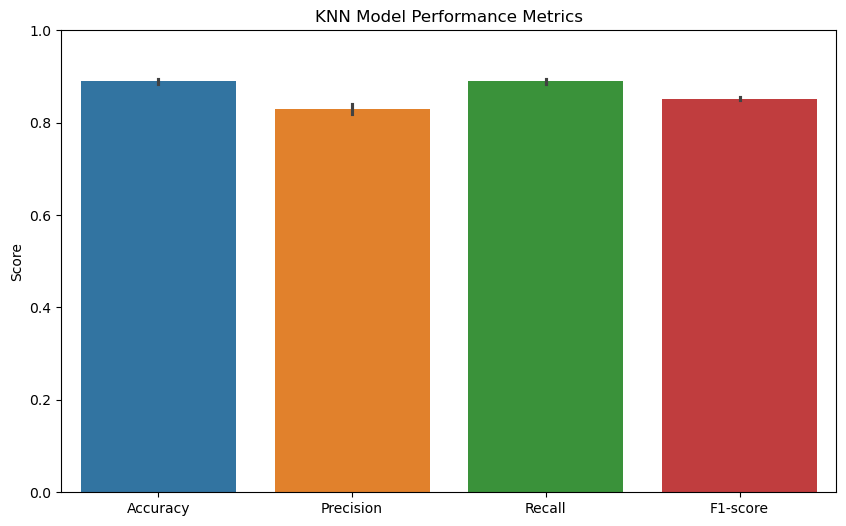

In [46]:
# Visualize all metrics in knn
KNN_metrics = pd.DataFrame(knn_cv_all_results).filter(like='test_')
KNN_metrics.columns = ['Accuracy', 'Precision', 'Recall', 'F1-score']

plt.figure(figsize=(10, 6))
sns.barplot(data=KNN_metrics)
plt.title('KNN Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

## Activity

### Team Members
Write your name here:
Sravan Phani Kumar Kopparthi

Write your group member's name here: 
1. name 1 : Jasmine Patrice Darby

2. name 2:  Sheronda N. Wilson


### Questions
1. Compare the regular splitting of training and test (random splitting) method vs Stratified Kfold method when to run the Random Forest classification. Which one has better metrics? Use accuracy and precision metrics in a side-by-side bar plots.

2. In kernel learning classification, compare 'rbf', 'precomputed', and 'linear' distance calculations. Use a type of plot to visualize. Which has better accuracy? Which has better precision? 

3. Plot 2 boxplots for metrics of running 4 classification methods of your choice. Use stratified K-fold cross validation for this training: 
    (a) F1-score plot
    (b) Precision score plot

4. Explore different target variables in the dataset and choose the same classification methods to run. Use the stratified K-fold to split the data into training and test sets. Does the same method show the best precision score?

### Answer Question 1.

In [72]:
# random splitting
rf_model_q1 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, min_samples_leaf=1)
rf_model_q1.fit(X_train, y_train)
rf_predictions_q1 = rf_model_q1.predict(X_test)
rf_accuracy_q1 = accuracy_score(y_test, rf_predictions_q1)
rf_precision_q1 = precision_score(y_test, rf_predictions_q1)
print("Random Forest Accuracy:", rf_accuracy_q1)
print("Random Forest Precision:", rf_precision_q1)

RF_rd_all_results_q1=pd.DataFrame({'Random_Accuracy':[rf_accuracy_q1],
                         'Random_Precision': [rf_precision_q1]})
RF_rd_all_results_q1

Random Forest Accuracy: 0.9029411764705882
Random Forest Precision: 0.0


/opt/homebrew/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Random_Accuracy,Random_Precision
0,0.902941,0.0


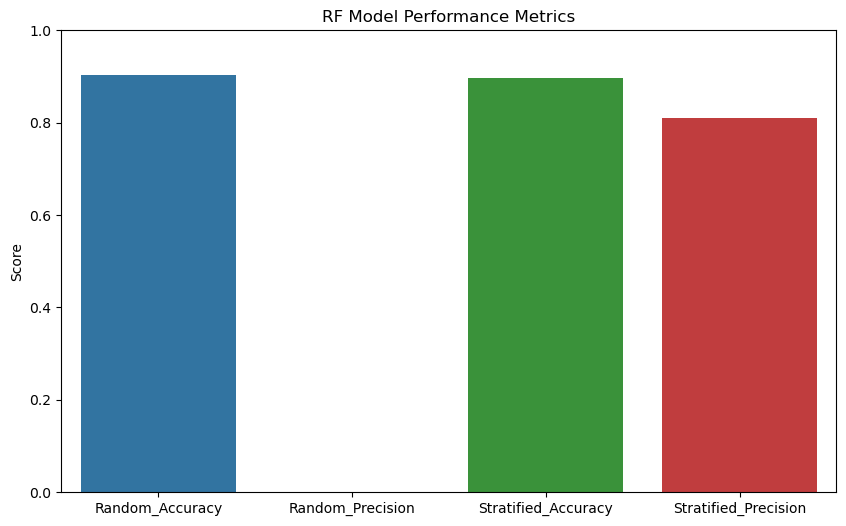

In [ ]:
##1. 
#Stratified Kfold
metrics_q1 = {
    'Stratified_Accuracy': make_scorer(accuracy_score),
    'Stratified_Precision': make_scorer(precision_score, average='weighted', zero_division=0),
    
}

RF_cv_all_results_q1 = cross_validate(RF, X, y, cv=cv, scoring=metrics_q1)
RF_metrics_q1 = pd.DataFrame(RF_cv_all_results_q1).filter(like='test_')
RF_metrics_q1.columns = ['Stratified_Accuracy', 'Stratified_Precision']


Merged_RF=pd.merge(RF_rd_all_results_q1,RF_metrics_q1,left_index=True, right_index=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=Merged_RF)
plt.title('RF Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()